In [1]:
# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyIEEM.models.utils import initialize_epinomic_model

In [3]:
# simulation settings
simulation_start = '2020-03-01'
countries = ['BE','SWE']
colors = ['black', 'red']

# intialise models
prodfunc = 'weakly_critical'
spatial = True
age_classes = pd.IntervalIndex.from_tuples([(0,5),(5,10),(10,15),(15,20),(20,25),(25,30),(30,35),(35,40),(40,45),(45,50),(50,55),(55,60),(60,65),(65,70),(70,75),(75,80),(80,120)], closed='left')
models = []
for country in countries:
    models.append(initialize_epinomic_model(country, age_classes, spatial, simulation_start, contact_type='absolute_contacts', prodfunc=prodfunc))

2020-03-01 00:00:00 0.0
2020-03-01 01:44:14.290185 -1.2631624817309164e-06
2020-03-01 00:31:18.820409 -3.794603991289608e-07
2020-03-01 00:46:58.230613 -5.601107780071163e-07
2020-03-01 01:02:37.640817 -7.470059899116252e-07
2020-03-01 06:15:45.844903 -4.423379169885397e-06
2020-03-01 08:52:19.946945 -5.395792866355212e-06
2020-03-01 11:28:54.048988 -7.129018836905479e-06
2020-03-02 07:14:14.956660 -1.7570587528994853e-05
2020-03-02 17:06:55.410497 -1.528055121464559e-05
2020-03-03 02:59:35.864333 -2.4431229572520848e-05
2020-03-01 20:15:49.487730 -1.1770618419331629e-05
2020-03-02 00:39:17.207101 -1.2597874013443183e-05
2020-03-02 05:02:44.926472 -1.499218089747716e-05
2020-03-01 18:12:52.707301 -1.0687601313751402e-05
2020-03-01 21:34:52.036458 -1.158859323805809e-05
2020-03-02 00:56:51.365614 -1.3332979764396537e-05
2020-03-01 15:58:02.886204 -9.499899617305809e-06
2020-03-01 18:12:37.304812 -1.0295480702669582e-05
2020-03-01 20:27:11.723420 -1.1427225906078157e-05
2020-03-02 00:56:

2020-03-24 20:04:14.432673 -0.3359741672512941
2020-03-24 20:04:14.432673 -0.010517818044944857
2020-03-25 04:52:11.212789 -0.33670500502601214
2020-03-25 04:52:11.212789 -0.011248655819662836
2020-03-25 09:16:09.602848 -0.3371394959818888
2020-03-25 09:16:09.602848 -0.011683146775539634
2020-03-25 13:40:07.992906 -0.3375363457053802
2020-03-25 13:40:07.992906 -0.012079996499030899
2020-03-25 22:25:32.867853 -0.3383978576175073
2020-03-25 22:25:32.867853 -0.012941508411158107
2020-03-26 02:48:15.305327 -0.33894697669216856
2020-03-26 02:48:15.305327 -0.013490627485819353
2020-03-26 07:10:57.742800 -0.3393862473202937
2020-03-26 07:10:57.742800 -0.013929898113944487
2020-03-25 21:32:04.187533 -0.33831017078851783
2020-03-25 21:32:04.187533 -0.012853821582168655
2020-03-26 01:28:02.284846 -0.3388410774055524
2020-03-26 01:28:02.284846 -0.013384728199203187
2020-03-26 05:24:00.382159 -0.3392476313362153
2020-03-26 05:24:00.382159 -0.013791282129866102
2020-03-26 13:15:56.576786 -0.3401665

2020-04-13 21:13:25.474026 -0.3839394027288395
2020-04-13 21:13:25.474026 -0.05848305352249029
2020-04-14 06:06:01.505877 -0.3843680548810967
2020-04-14 06:06:01.505877 -0.05891170567474751
2020-04-14 10:32:19.521803 -0.3845551748434473
2020-04-14 10:32:19.521803 -0.059098825637098104
2020-04-14 14:58:37.537729 -0.3847598627587244
2020-04-14 14:58:37.537729 -0.05930351355237519
2020-04-14 23:53:14.186470 -0.3851535607296021
2020-04-14 23:53:14.186470 -0.05969721152325297
2020-04-15 04:20:32.510841 -0.385322825065142
2020-04-15 04:20:32.510841 -0.059866475858792824
2020-04-15 08:47:50.835212 -0.38551087156315755
2020-04-15 08:47:50.835212 -0.06005452235680847
2020-04-15 17:38:48.236751 -0.38586625425986376
2020-04-15 17:38:48.236751 -0.06040990505351459
2020-04-15 22:04:16.937521 -0.38601868973907055
2020-04-15 22:04:16.937521 -0.06056234053272132
2020-04-16 02:29:45.638290 -0.38618881971903063
2020-04-16 02:29:45.638290 -0.060732470512681325
2020-04-16 11:23:41.822346 -0.38651392403983

TypeError: make_social_contact_function.__call__() missing 1 required positional argument: 'economic_closures'

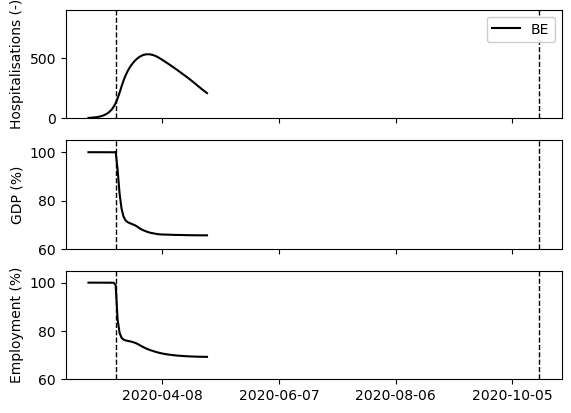

In [4]:
# simulate model
simulation_end = '2020-05-01'

fig, ax = plt.subplots(nrows=3, sharex=True)

for model, color, label in zip(models, colors, countries):
    
    # simulate model
    out = model.sim([simulation_start, simulation_end])

    ax[0].plot(out.date, out.Hin.sum(dim=['age_class', 'spatial_unit']), color=color, label=label)
    ax[0].legend(loc=1, framealpha=1)
    ax[0].axvline(x=datetime(2020, 3, 15), color='black', linestyle='--', linewidth=1)
    ax[0].axvline(x=datetime(2020, 10, 19), color='black', linestyle='--', linewidth=1)
    ax[0].set_ylabel('Hospitalisations (-)')
    ax[0].xaxis.set_major_locator(plt.MaxNLocator(5))
    ax[0].set_ylim([-1, 900])

    ax[1].plot(out.date, out.x.sum(dim='NACE64')/sum(model.parameters['x_0'])*100, color=color, label=label)
    ax[1].axvline(x=datetime(2020, 3, 15), color='black', linestyle='--', linewidth=1)
    ax[1].axvline(x=datetime(2020, 10, 19), color='black', linestyle='--', linewidth=1)
    ax[1].set_ylabel('GDP (%)')
    ax[1].xaxis.set_major_locator(plt.MaxNLocator(5))
    ax[1].set_ylim([60, 105])

    ax[2].plot(out.date, out.l.sum(dim='NACE64')/sum(model.parameters['l_0'])*100, color=color, label=label)
    ax[2].axvline(x=datetime(2020, 3, 15), color='black', linestyle='--', linewidth=1)
    ax[2].axvline(x=datetime(2020, 10, 19), color='black', linestyle='--', linewidth=1)
    ax[2].set_ylabel('Employment (%)')
    ax[2].xaxis.set_major_locator(plt.MaxNLocator(5))
    ax[2].set_ylim([60, 105])

plt.savefig(f'epinomic.png', dpi=400)
plt.show()
plt.close()